## Application of Differentiation: Newton's Method

<p>In this independent work, you are going to implement an application of differentiation: Newton's Method</p>

<p>For more information, check out the textbook. </p>


In [132]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.axisartist.axislines import SubplotZero
from sympy.abc import x
from pylab import *

import warnings
warnings.filterwarnings('ignore')

## Task 1: Derivative
<p>Write a function that takes two inputs: f(x) and a value x_0 and returns m the slope of the tangent to the given function at the given point. </p>

<p> For example, your_function(x**2+2*x+2, 4) should return 10. </p>

In [133]:
def f(x):
    return x**3

def dif(x):
    return sym.diff(f(x))

x_0 = sym.lambdify((x), dif(x), "numpy")
print("The slope of the tangent line of a given function", f(x), "at the given point is: ", int(x_0(3)))



The slope of the tangent line of a given function x**3 at the given point is:  27


In [ ]:
Task #2

In [134]:
def my_function(m, x_y):
    y = m*(x - x_y[0]) + x_y[1]
    return y
print("Equation of the line passing trough the given points with given slope is: ", my_function(27, (3, 20)))

Equation of the line passing trough the given points with given slope is:  27*x - 61


## Task 3: Root of a Line

<p> Write a function that takes a linear function that is returned in the previous task, and returns it's root </p>

<p> For example, your_function(x+1) should return -1 </p>

<p> Be careful: Make sure that you have considered those lines without roots </p>

In [135]:
def my_function(m, x_y):
    y = m*(x - x_y[0]) + x_y[1]
    return y

def root(x):
    r = sym.solve(x)
    m = []
    for i in r:
        if i.is_real == True:
            m.append(i)
    if len(m) == 0:
        print('Function do not have any real roots')
    return m[0]

root(27*x - 61)

61/27

## Task 4: Newton's Method
<p>Implement Newton's Method that takes a function as an input and returns any root of the function.</p>

In [136]:
from scipy.misc import derivative
x_n = 2
x = np.linspace(0.2, 2.2, 500)

def f(x):
    return np.log(x**3)

def x_next(f, x, x_n):
    slope = derivative(f, x_n, dx = 0.1)
    return x_n - f(x_n) / slope

for j in range(8):
    print('x_{} = {:.10f}'.format(j + 1, x_n))
    x_n = x_next(f, x, x_n)

x_1 = 2.0000000000
x_2 = 0.6148616554
x_3 = 0.9112489922
x_4 = 0.9955985865
x_5 = 0.9999754908
x_6 = 0.9999999178
x_7 = 0.9999999997
x_8 = 1.0000000000


## Task 5: Visualization

<p> Visualize the procedure as much as possible. </p>

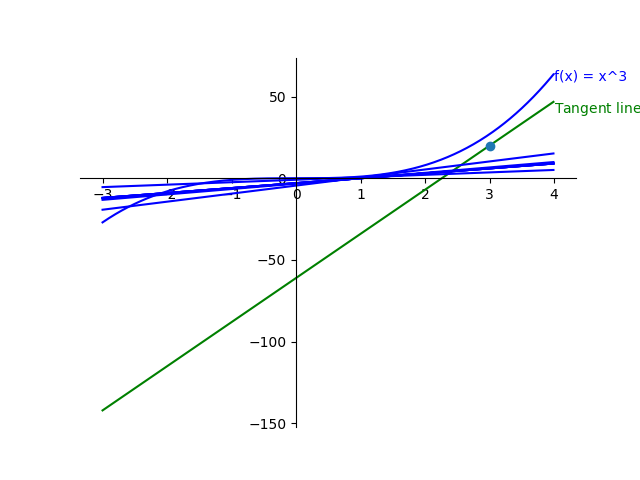

<Figure size 640x480 with 0 Axes>

In [137]:
ax = subplot(111)
def func(x):
    return x**3
    
x = arange(-3, 4, 0.01)
y = func(x)
plot(x, y, 'b-')

y_tangent = 27*x - 61     #slope of the tangent line
plot(x, y_tangent, 'g-')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

text(4, 60, 'f(x) = x^3', color = 'blue')
text(4, 40, r"Tangent line at x = 3: $t(x) = -x + 3$",  color = 'green')

x_n = 2
for j in range(8):
    # print('x_{} = {:.10f}'.format(j + 1, x_n))
    tanFun = my_function(derivative(f, x_n, dx = 0.1),[x_n,f(x_n)])
    tanX = arange(-3, 4, 0.01)
    plot(tanX, tanFun,'b-')
    x_n = x_next(f, x, x_n)

plot(3, 20, 'o')
plt.show()